# Linear Regression
- https://heartbeat.fritz.ai/linear-regression-using-tensorflow-2-0-1cd51e211e1f

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

2.0.0


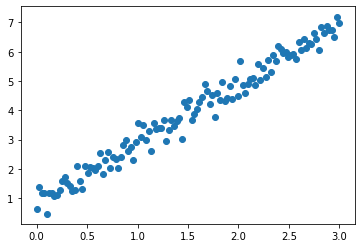

In [6]:
# actual weight=2 and actual bias=0.9
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3

plt.scatter(x, y, label='input data set')

In [11]:
class LinearModel:
    
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

        
def loss(y, pred):
    # sum((y - y_hat)**2) / n
    return tf.reduce_mean(tf.square(y - pred))

def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        # Note that the tf.GradientTape method is used for automatic differentiation,
        # computing the gradient of a computation with respect to its input variables.
        # Hence, all operations executed inside the context of a tf.GradientTape are recorded.
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [12]:
linear_model = LinearModel()
Weights, Biases = [], []
epochs = 80
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.12)
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 666.8132934570312
Epoch count 1: Loss value: 10.543622016906738
Epoch count 2: Loss value: 5.275228023529053
Epoch count 3: Loss value: 4.757719993591309
Epoch count 4: Loss value: 4.3194499015808105
Epoch count 5: Loss value: 3.9224703311920166
Epoch count 6: Loss value: 3.562692165374756
Epoch count 7: Loss value: 3.2366271018981934
Epoch count 8: Loss value: 2.941117763519287
Epoch count 9: Loss value: 2.6732985973358154
Epoch count 10: Loss value: 2.4305760860443115
Epoch count 11: Loss value: 2.2105984687805176
Epoch count 12: Loss value: 2.0112340450286865
Epoch count 13: Loss value: 1.8305516242980957
Epoch count 14: Loss value: 1.6668002605438232
Epoch count 15: Loss value: 1.5183931589126587
Epoch count 16: Loss value: 1.3838931322097778
Epoch count 17: Loss value: 1.2619965076446533
Epoch count 18: Loss value: 1.1515225172042847
Epoch count 19: Loss value: 1.0514005422592163
Epoch count 20: Loss value: 0.9606609344482422
Epoch count 21: Loss value: 

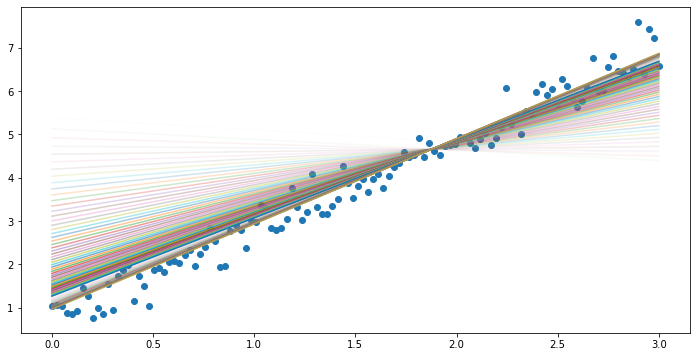

In [28]:
x = np.linspace(0, 3, 120)

y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3
y_hats = [w * x + b for w, b in zip(Weights, Biases)]

plt.figure(figsize=(12, 6))
plt.scatter(x, y)
for idx, y_hat in enumerate(y_hats[1:]):
    plt.plot(x, y_hat, alpha=0.02 * idx)

In [30]:
linear_model.Weight.numpy(), linear_model.Bias.numpy()

(1.9718385, 0.9591356)